In [1]:
## Bibliotheken

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Data-Loading

In [3]:
labelList=['symboling','normalizedLosses','make','fuelType','aspiration','numOfDoors','bodyStyle','driveWheels','engineLocation',
           'wheelBase','length','width','height','curbWeight','engineType','numOfCylinders','engineSize','fuelSystem','bore',
           'stroke','compressionRatio','horsepower','peakRpm','cityMpg','highwayMpg','price']
df = pd.read_csv('../data/data_car-CopyForEDA.csv',delimiter=',',encoding='utf-8', names=labelList)
df = df.replace("?", np.nan)
df[['price']]=df[['price']].astype('float64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null int64
normalizedLosses    164 non-null object
make                205 non-null object
fuelType            205 non-null object
aspiration          205 non-null object
numOfDoors          203 non-null object
bodyStyle           205 non-null object
driveWheels         205 non-null object
engineLocation      205 non-null object
wheelBase           205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curbWeight          205 non-null int64
engineType          205 non-null object
numOfCylinders      205 non-null object
engineSize          205 non-null int64
fuelSystem          205 non-null object
bore                201 non-null object
stroke              201 non-null object
compressionRatio    205 non-null float64
horsepower          203 non-null object
peakRpm      

In [5]:
output_features = [
    "symboling"
]

input_features = [
    'normalizedLosses',
    'make',
    'fuelType',
    'aspiration',
    'numOfDoors',
    'bodyStyle',
    'driveWheels',
    'engineLocation',
    'wheelBase',
    'length',
    'width',
    'height',
    'curbWeight',
    'engineType',
    'numOfCylinders',
    'engineSize',
    'fuelSystem',
    'bore',
    'stroke',
    'compressionRatio',
    'horsepower',
    'peakRpm',
    'cityMpg',
    'highwayMpg',
    'price'
]

train_X, test_X, train_y, test_y = train_test_split(
    df[input_features], 
    df[output_features],
    test_size=0.2
)

In [6]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((164, 25), (41, 25), (164, 1), (41, 1))

In [7]:
import numpy as np

def pretty_confusion(target, prediction):
    """Prettify the on-board confusion matrix of sklearn."""
    
    cmc = ["Condition positive", "Condition negative"]
    cmi = ["Predicted condition positive", "Predicted condition negative"]
    
    matrix = confusion_matrix(target, prediction)
    cm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return pd.DataFrame(cm , columns=cmc, index=cmi)


def debug_print(X, debug):
    """This method prints some debug information based on a debug parameter."""
    if not debug in ["input", "shape", "columns", False]:
        raise ValueError("Debug parameter value is not valied.")
    elif debug=="input":
        print(X.head(5))
    elif debug=="shape":
        print(X.shape)
    elif debug=="columns":
        print(X.columns)
    elif debug is False:
        pass

In [8]:
class PriceImputer():
    """Imputs Price with median price of car-Brand."""
    def __init__(self, debug=False):
        self.d = debug
        self.colnames = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        debug_print(X=X, debug=self.d)
        df = X.copy()

        df.price = df.groupby(['make'])['price'].apply(lambda x: x.fillna(x.median()))
        self.colnames = df.columns.tolist()
        return df
    
    def get_feature_names(self):
        return self.colnames 

In [9]:
class FeatureSelector:
    """This transformer lets you pick columns from a pandas dataset based on name"""
    def __init__(self, features = [], debug=False):
        self.d = debug
        self.colnames = None
        if type(features) != list:
            raise ValueError("Input features must be of type List.")
        elif type(features) == list:
            self.columns = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        debug_print(X=X, debug=self.d)
        X = X[self.columns]
        self.colnames = X.columns.tolist()
        return X
    
    def get_feature_names(self):
        return self.colnames

In [10]:
from sklearn.pipeline import Pipeline

class FeaturePipeline(Pipeline):
    def get_feature_names(self):
        return self.steps[-1][1].get_feature_names()

In [11]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

debug_state = False

pipe = FeaturePipeline(
    [

        ("price_imputation", PriceImputer(debug=False))
    ]
)

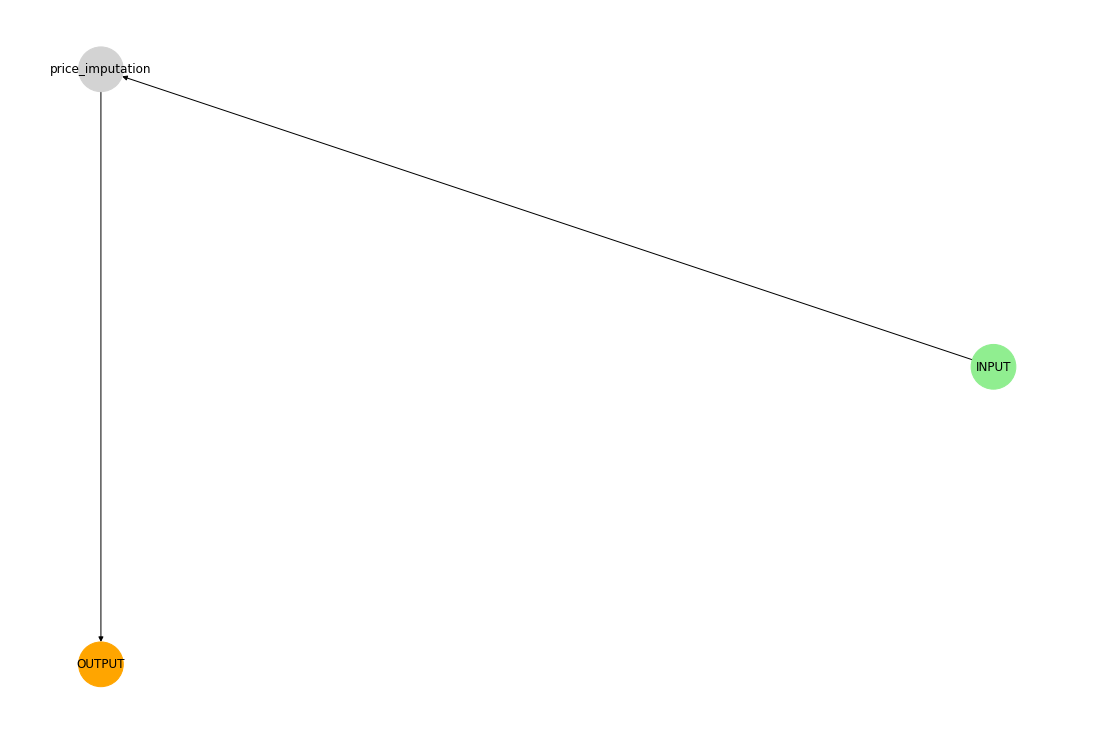

In [12]:
from pipe_tools.pipe_visualizer import plot_pipeline
plot_pipeline(pipe, "pipeline_plot.png")

In [13]:
print(train_X.price.isna().any())
train_X_prepared = pipe.transform(train_X)
print(train_X_prepared.price.isna().any())
print(type(train_X_prepared))

True
False
<class 'pandas.core.frame.DataFrame'>
